In [1]:
# Import the required modules
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np

# visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
from sklearn.linear_model import LogisticRegression,LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, ExtraTreesRegressor, GradientBoostingRegressor

# Metrics
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve, RocCurveDisplay
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
# Preprocessing
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, OrdinalEncoder
from sklearn.model_selection import train_test_split

# suppress warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("Resources/dataset.csv")
df.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        114000 non-null  int64  
 1   track_id          114000 non-null  object 
 2   artists           113999 non-null  object 
 3   album_name        113999 non-null  object 
 4   track_name        113999 non-null  object 
 5   popularity        114000 non-null  int64  
 6   duration_ms       114000 non-null  int64  
 7   explicit          114000 non-null  bool   
 8   danceability      114000 non-null  float64
 9   energy            114000 non-null  float64
 10  key               114000 non-null  int64  
 11  loudness          114000 non-null  float64
 12  mode              114000 non-null  int64  
 13  speechiness       114000 non-null  float64
 14  acousticness      114000 non-null  float64
 15  instrumentalness  114000 non-null  float64
 16  liveness          11

In [4]:
df.describe()

,Unnamed: 0,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,114000.000000,114000.000000,1.140000e+05,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000
mean,56999.500000,33.238535,2.280292e+05,0.566800,0.641383,5.309140,-8.258960,0.637553,0.084652,0.314910,0.156050,0.213553,0.474068,122.147837,3.904035
std,32909.109681,22.305078,1.072977e+05,0.173542,0.251529,3.559987,5.029337,0.480709,0.105732,0.332523,0.309555,0.190378,0.259261,29.978197,0.432621
min,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,-49.531000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,28499.750000,17.000000,1.740660e+05,0.456000,0.472000,2.000000,-10.013000,0.000000,0.035900,0.016900,0.000000,0.098000,0.260000,99.218750,4.000000
50%,56999.500000,35.000000,2.129060e+05,0.580000,0.685000,5.000000,-7.004000,1.000000,0.048900,0.169000,0.000042,0.132000,0.464000,122.017000,4.000000
75%,85499.250000,50.000000,2.615060e+05,0.695000,0.854000,8.000000,-5.003000,1.000000,0.084500,0.598000,0.049000,0.273000,0.683000,140.071000,4.000000
max,113999.000000,100.000000,5.237295e+06,0.985000,1.000000,11.000000,4.532000,1.000000,0.965000,0.996000,1.000000,1.000000,0.995000,243.372000,5.000000


In [5]:
# Drop unwanted columns
cols_to_drop = ["Unnamed: 0", "track_id","artists" ,"album_name","track_name","track_genre"]
df = df.drop(columns=cols_to_drop)
df.head()

,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4
1,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4
2,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4
3,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3
4,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4


In [6]:
#changing boolean column to numerical
df['explicit'] = df['explicit'].astype(int)

In [7]:
df.head()

,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,73,230666,0,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4
1,55,149610,0,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4
2,57,210826,0,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4
3,71,201933,0,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3
4,82,198853,0,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4


In [8]:
df.columns

Index(['popularity', 'duration_ms', 'explicit', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature'],
      dtype='object')

In [9]:
num_cols = ["popularity","danceability", "energy", "loudness", "speechiness", "acousticness", "instrumentalness", "liveness", "valence", "tempo"]

cat_cols = [ 'key', 'mode','time_signature']
meta = ['explicit']


In [10]:
# Initalize and Fit the Scaler
ss = StandardScaler()
ss.fit(df.loc[:, num_cols])

# Transform the Data
df_scaled = pd.DataFrame(ss.transform(df.loc[:, num_cols]), columns=num_cols)
df_scaled.head()

,popularity,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,1.782627,0.629244,-0.717148,0.300828,0.551848,-0.850202,-0.504109,0.758743,0.929306,-1.141863
1,0.975633,-0.845908,-1.889980,-1.784744,-0.078993,1.831732,-0.504094,-0.591211,-0.798690,-1.489717
2,1.065299,-0.742186,-1.122669,-0.293288,-0.273826,-0.315499,-0.504112,-0.507167,-1.365688,-1.528312
3,1.692961,-1.733304,-2.312994,-2.039252,-0.457309,1.774593,-0.503883,-0.428376,-1.276974,1.987859
4,2.186125,0.295030,-0.788711,-0.282750,-0.303145,0.463399,-0.504112,-0.686285,-1.184403,-0.073348


In [11]:
# Lets look at Categories  next
df_cat = df.loc[:, cat_cols]
df_cat.head()

,key,mode,time_signature
0,1,0,4
1,1,1,4
2,0,1,4
3,0,1,3
4,2,1,4


In [12]:
df_final = df.loc[:, meta]
df_final = pd.concat([df_final, df_scaled], axis=1)
#df_final = pd.concat([df_final, df_cat], axis=1)
df_final.head()

,explicit,popularity,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,0,1.782627,0.629244,-0.717148,0.300828,0.551848,-0.850202,-0.504109,0.758743,0.929306,-1.141863
1,0,0.975633,-0.845908,-1.889980,-1.784744,-0.078993,1.831732,-0.504094,-0.591211,-0.798690,-1.489717
2,0,1.065299,-0.742186,-1.122669,-0.293288,-0.273826,-0.315499,-0.504112,-0.507167,-1.365688,-1.528312
3,0,1.692961,-1.733304,-2.312994,-2.039252,-0.457309,1.774593,-0.503883,-0.428376,-1.276974,1.987859
4,0,2.186125,0.295030,-0.788711,-0.282750,-0.303145,0.463399,-0.504112,-0.686285,-1.184403,-0.073348


In [13]:
# correlation analysis
corrs = df_final.corr()
corrs

,explicit,popularity,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
explicit,1.000000,0.044082,0.122507,0.096955,0.108588,0.307952,-0.094403,-0.103404,0.032549,-0.003381,-0.002816
popularity,0.044082,1.000000,0.035448,0.001056,0.050423,-0.044927,-0.025472,-0.095139,-0.005387,-0.040534,0.013205
danceability,0.122507,0.035448,1.000000,0.134325,0.259077,0.108626,-0.171533,-0.185606,-0.131617,0.477341,-0.050450
energy,0.096955,0.001056,0.134325,1.000000,0.761690,0.142509,-0.733906,-0.181879,0.184796,0.258934,0.247851
loudness,0.108588,0.050423,0.259077,0.761690,1.000000,0.060826,-0.589803,-0.433477,0.076899,0.279848,0.212446
speechiness,0.307952,-0.044927,0.108626,0.142509,0.060826,1.000000,-0.002186,-0.089616,0.205219,0.036635,0.017273
acousticness,-0.094403,-0.025472,-0.171533,-0.733906,-0.589803,-0.002186,1.000000,0.104027,-0.020700,-0.107070,-0.208224
instrumentalness,-0.103404,-0.095139,-0.185606,-0.181879,-0.433477,-0.089616,0.104027,1.000000,-0.079893,-0.324312,-0.050330
liveness,0.032549,-0.005387,-0.131617,0.184796,0.076899,0.205219,-0.020700,-0.079893,1.000000,0.019086,0.000600
valence,-0.003381,-0.040534,0.477341,0.258934,0.279848,0.036635,-0.107070,-0.324312,0.019086,1.000000,0.078273


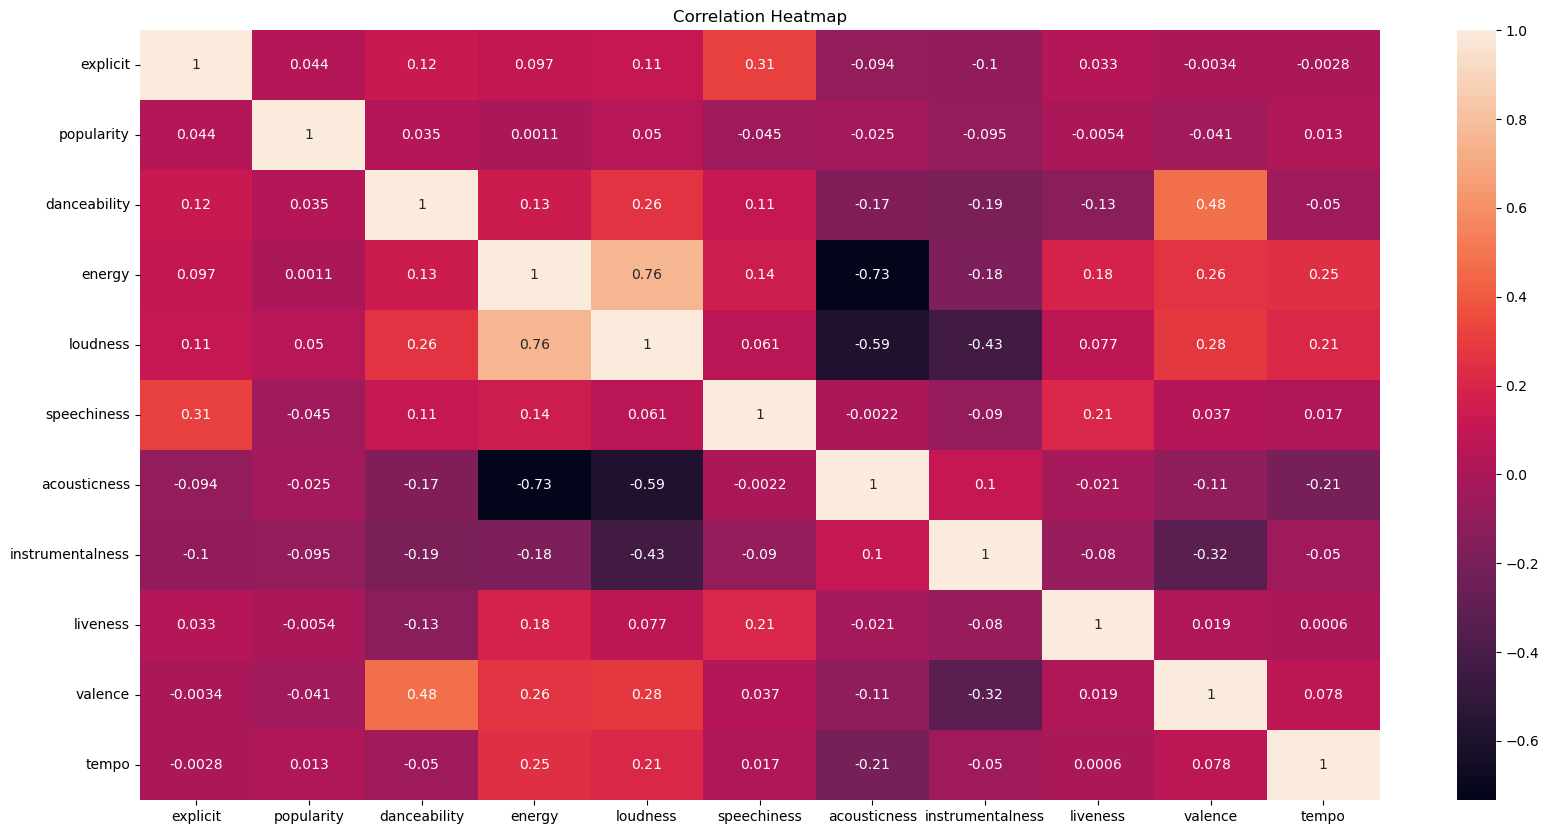

In [14]:
# Plot the heatmap

plt.figure(figsize=(20,10))
sns.heatmap(corrs, annot=True)
plt.title("Correlation Heatmap")
plt.show()

In [15]:
# Step 1: Get the Data
X = df_final.drop(columns=["popularity"])
y = df_final.popularity

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42,) 
print(X.shape)
print(X_train.shape)
print(X_test.shape)

(114000, 10)
(85500, 10)
(28500, 10)


In [16]:
# Function for Regression
def doRegression(model, X_train, X_test, y_train, y_test):
    # Step 3: Fit the model
    model.fit(X_train, y_train)
    
    # Step 4: Evaluate the model
    train_preds = model.predict(X_train)
    test_preds = model.predict(X_test)

    # Generate metrics TRAIN
    train_r2 = r2_score(y_train, train_preds)
    train_mse = mean_squared_error(y_train, train_preds)
    train_mae = mean_absolute_error(y_train, train_preds)
    train_rmse = np.sqrt(train_mse)
    
    train_results = f"""TRAIN METRICS
    R2: {train_r2}
    MSE: {train_mse}
    RMSE: {train_rmse}
    MAE: {train_mae}
    """
    
    print(train_results)

    # Generate metrics TEST
    test_r2 = r2_score(y_test, test_preds)
    test_mse = mean_squared_error(y_test, test_preds)
    test_mae = mean_absolute_error(y_test, test_preds)
    test_rmse = np.sqrt(test_mse)
    
    test_results = f"""TEST METRICS
    R2: {test_r2}
    MSE: {test_mse}
    RMSE: {test_rmse}
    MAE: {test_mae}
    """
    
    print(test_results)

    # VISUALIZE TEST RESULTS
    # Predicted vs Actual Plot
    plt.scatter(y_test, test_preds)
    plt.plot(y_test, y_test)
    plt.title("Predicted vs Actual Plot")
    plt.xlabel("Actual")
    plt.ylabel("Predicted")
    plt.show()

    # Residual Plot
    resids = test_preds - y_test
    plt.scatter(test_preds, resids)
    plt.hlines(0, min(test_preds), max(test_preds))
    plt.title("Residual Plot")
    plt.xlabel("Predictions")
    plt.ylabel("Residuals")
    plt.show()

TRAIN METRICS
    R2: 0.02452643985127878
    MSE: 0.9769169736856994
    RMSE: 0.9883911036050959
    MAE: 0.8249373067883945
    
TEST METRICS
    R2: 0.023421450448604553
    MSE: 0.9722218347999134
    RMSE: 0.9860131007242822
    MAE: 0.8239917908565707
    


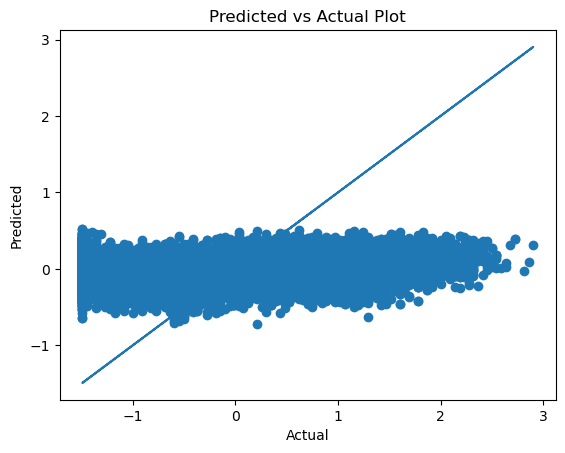

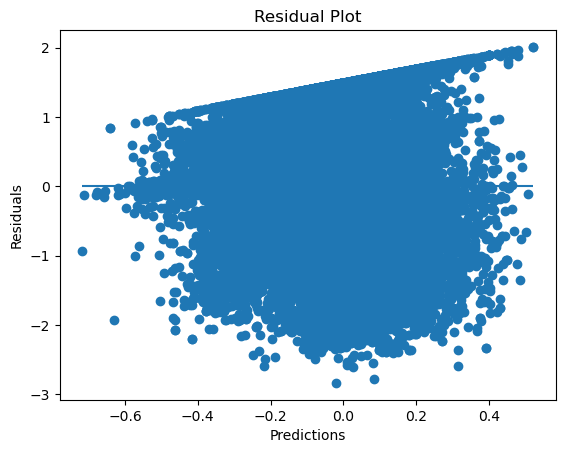

In [17]:
# Step 2: Init the model
lr = LinearRegression()

doRegression(lr, X_train, X_test, y_train, y_test)

TRAIN METRICS
    R2: 0.9041933581022684
    MSE: 0.09594840750727465
    RMSE: 0.30975539948042013
    MAE: 0.1984245524928712
    
TEST METRICS
    R2: 0.5285552542470493
    MSE: 0.46934153523365957
    RMSE: 0.6850850569335603
    MAE: 0.49156927169597125
    


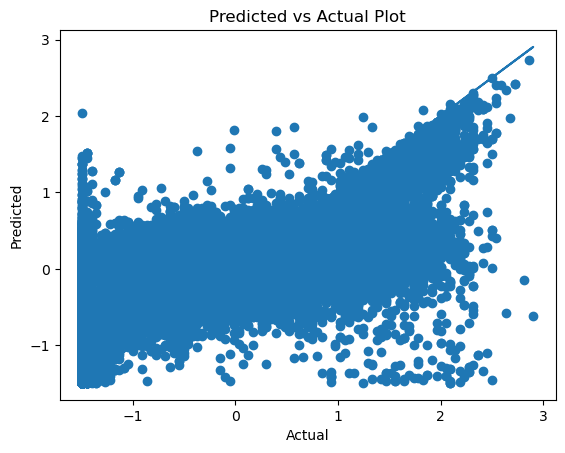

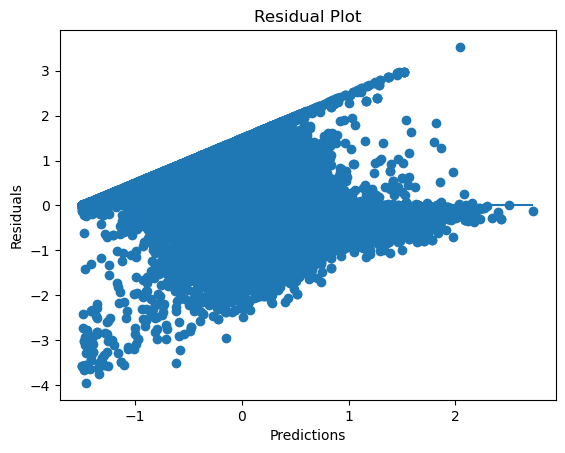

In [18]:
# Step 2: Init the Model
rf = RandomForestRegressor(random_state=42)

# Do Machine Learning
doRegression(rf, X_train, X_test, y_train, y_test)

TRAIN METRICS
    R2: 0.031174636869613637
    MSE: 0.9702589392940468
    RMSE: 0.9850172279173836
    MAE: 0.8274350531392658
    
TEST METRICS
    R2: 0.028805188241183943
    MSE: 0.966862114952301
    RMSE: 0.9832914699885792
    MAE: 0.8265869669217566
    


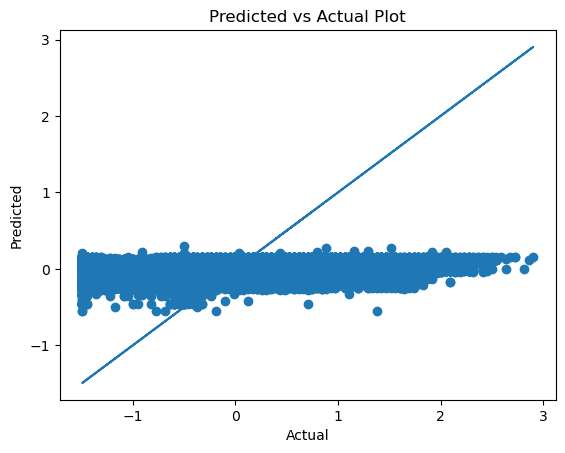

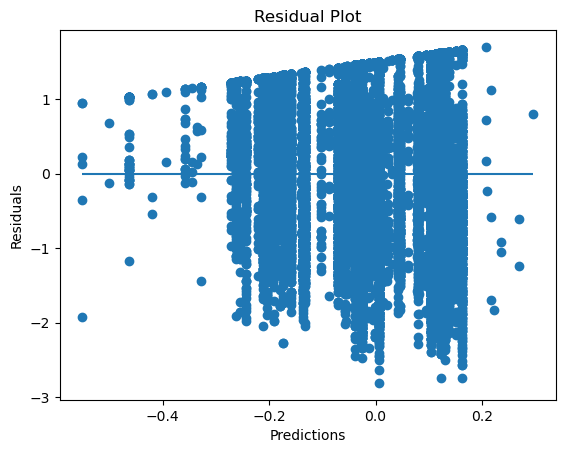

In [19]:
# Step 2: Init the Model
ada = AdaBoostRegressor(random_state=42)

# Do Machine Learning
doRegression(ada, X_train, X_test, y_train, y_test)

TRAIN METRICS
    R2: 0.09145233268379138
    MSE: 0.909892050245249
    RMSE: 0.9538826186933322
    MAE: 0.7862516623420056
    
TEST METRICS
    R2: 0.08207770065049769
    MSE: 0.9138272620131536
    RMSE: 0.9559431269762619
    MAE: 0.7891034231146709
    


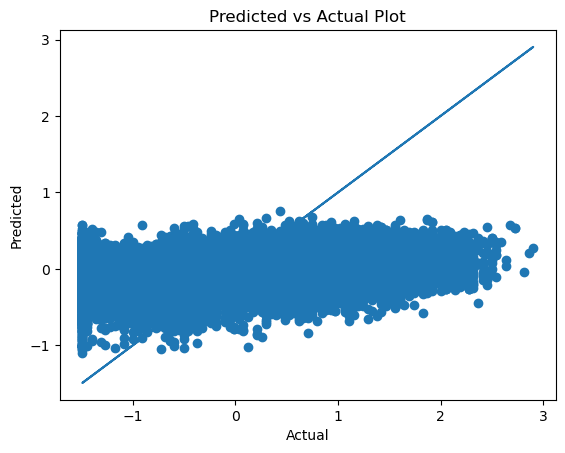

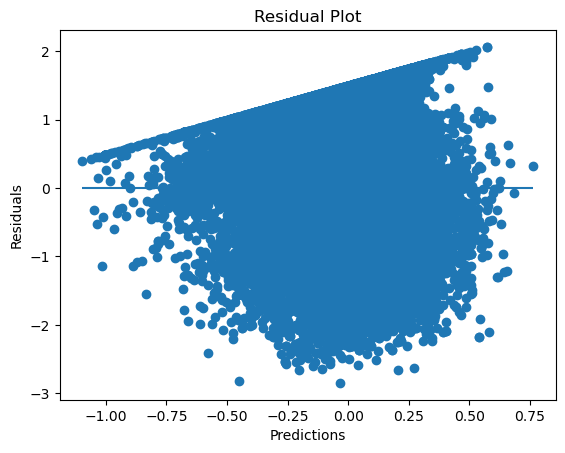

In [20]:
# Step 2: Init the Model
gb = GradientBoostingRegressor(random_state=42)

# Do Machine Learning
doRegression(gb, X_train, X_test, y_train, y_test)

In [ ]:
#The regression model is not working on the dataset looking at the correlation matrix.It would be better if we tried the classification model .
